## Libraries

In [ ]:
# install necessary librairies
!pip install --quiet fiona shapely pyproj rtree
!pip install --quiet geopandas
!pip install --quiet numpy==1.22
!pip install --quiet osmnx
!pip install --quiet branca
!pip install --quiet ipython-autotime
!pip install --quiet matplotlib

In [ ]:
# import the relevant libraries
import networkx as nx
import osmnx as ox
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.font_manager as fm
from matplotlib.lines import Line2D
from PIL import Image, ImageOps, ImageColor, ImageFont, ImageDraw
%load_ext autotime

time: 315 µs (started: 2023-01-16 00:24:12 +00:00)


## Font Families

In [ ]:
# To be able to customize the visual appearance of text in the code, external fonts can be downloaded and used, 
# instead of the default fonts.
# This code snippet is using the command line tool 'unzip' to extract the contents of multiple zip files 
# that are located in the "/content/drive/MyDrive/fonts/" directory. 
# The following lines of code extract the contents of the following files:
# Metropolis.zip, megren_font.zip, trajan_pro.zip, cooper_hewitt.zip, candara.zip, poppins.zip, 
# Soundmind.zip, pragmatica.zip, autumn_flower.zip, Free_Sans.zip, Nimbus_sans.zip, 
# Brandon_Grotesque_Light.zip, and Brandon_Grotesque_Thin.zip. 
!unzip "/content/drive/MyDrive/fonts/Metropolis.zip"
!unzip "/content/drive/MyDrive/fonts/megren_font.zip"
!unzip "/content/drive/MyDrive/fonts/trajan_pro.zip"
!unzip "/content/drive/MyDrive/fonts/cooper_hewitt.zip"
!unzip "/content/drive/MyDrive/fonts/candara.zip"
!unzip "/content/drive/MyDrive/fonts/poppins.zip"
!unzip "/content/drive/MyDrive/fonts/Soundmind.zip"
!unzip "/content/drive/MyDrive/fonts/pragmatica.zip"
!unzip "/content/drive/MyDrive/fonts/autumn_flower.zip"
!unzip "/content/drive/MyDrive/fonts/Free_Sans.zip"
!unzip "/content/drive/MyDrive/fonts/Nimbus_sans.zip"
!unzip "/content/drive/MyDrive/fonts/Brandon_Grotesque_Light.zip"
!unzip "/content/drive/MyDrive/fonts/Brandon_Grotesque_Thin.zip"

In [ ]:
# move fonts to fonts' directory
!mv Candara*.ttf /usr/share/fonts/truetype/
!mv Poppins-*.otf /usr/share/fonts/truetype/
!mv Soundmind.otf /usr/share/fonts/truetype/
!mv TrajanPro-Regular.ttf /usr/share/fonts/truetype/
!mv MegrendemoRegular-OVxz6.otf /usr/share/fonts/truetype/
!mv Metropolis-*.otf /usr/share/fonts/truetype/
!mv Pragmatica-ExtraLight.ttf /usr/share/fonts/truetype/
!mv Autumn_Flower.otf /usr/share/fonts/truetype/
!mv FreeSans*.ttf /usr/share/fonts/truetype/
!mv NimbusSansNovusT-UltraLight.ttf /usr/share/fonts/truetype/
!mv mplus-2p-thin.ttf /usr/share/fonts/truetype/
!mv Coves_Light.otf  /usr/share/fonts/truetype/
!fc-cache -f -v

In [ ]:
# This code snippet is used to define and set properties for a number of different fonts 
# that will be used later in the code. It uses a library called 'matplotlib.font_manager' (fm)
# to set the font properties. These font properties are then used to customize the visual appearance of text in the code.

# The following fonts are defined and set: Megren Font, Sound mind, Metropolis - Thin, Autumn 
# flower, Grotesque_Light, Grotesque_Thin, Pragmatica-ExtraLight, NimbusSansNovusT-UltraLight, 
# Autho - Metropolis, Trajan pro, Cooper hewitt, Poppins thin, Poppins light italic, and Candara.

# Megren Font
megren =  "/usr/share/fonts/truetype/MegrendemoRegular-OVxz6.otf"
mfontprop = fm.FontProperties(fname = megren, size = 10)

#  Metropolis - Thin
soundmind = "/usr/share/fonts/truetype/Soundmind.otf"
soundmindprop = fm.FontProperties(fname = soundmind, size = 30)

# sound mind
metro_thin = "/usr/share/fonts/truetype/Metropolis-Thin.otf"
metrofontprop = fm.FontProperties(fname = metro_thin, size = 30)

# autumn flower 
autumn_flower = "/usr/share/fonts/truetype/Autumn_Flower.otf"
autumn_flower_prop = fm.FontProperties(fname = autumn_flower, size = 25)

# Grotesque_Light
grotesque_light = "/usr/share/fonts/truetype/Coves_Light.otf"
grotesque_light_prop = fm.FontProperties(fname = grotesque_light, size = 15)

# Grotesque_Thin
grotesque_thin = "/usr/share/fonts/truetype/mplus-2p-thin.ttf"
grotesque_thin_prop = fm.FontProperties(fname = grotesque_thin, size = 20)

# Pragmatica-ExtraLight
prag = "/usr/share/fonts/truetype/Pragmatica-ExtraLight.ttf"
prag_prop = fm.FontProperties(fname = prag, size = 30)

# NimbusSansNovusT-UltraLight
nimbus = "/usr/share/fonts/truetype/NimbusSansNovusT-UltraLight.ttf"
nimbus_prop = fm.FontProperties(fname = nimbus, size = 20)


# autho - metropolis
metro_thin = "/usr/share/fonts/truetype/Metropolis-Thin.otf"
metrofontprop_i = fm.FontProperties(fname = metro_thin, size = 20, weight = 'bold')

# trajan pro
trajan_pro_regular = "/usr/share/fonts/truetype/TrajanPro-Regular.ttf"
trajan_pro_regular_prop = fm.FontProperties(fname = trajan_pro_regular, size = 25)

# cooper hewitt
cooper_thin = "/usr/share/fonts/truetype/CooperHewitt-Thin.otf"
cooper_thin_prop = fm.FontProperties(fname = cooper_thin, size = 30)

# poppins thin
pop_thin =  "/usr/share/fonts/truetype/Poppins-ThinItalic.otf"
pop_thin_prop = fm.FontProperties(fname = pop_thin, size = 20)

# poppins light italic
pop_black = "/usr/share/fonts/truetype/Poppins-LightItalic.otf" 
pop_black_prop = fm.FontProperties(fname = pop_black, size = 20)

# candara
candara = "/usr/share/fonts/truetype/Candara.ttf"
candara_prop = fm.FontProperties(fname = candara, size = 15)

time: 2.83 ms (started: 2023-01-16 01:56:30 +00:00)


## Data Retrieval

In [ ]:
# This code snippet uses the osmnx library to create a graph object from a given place. eg. Accra

# this line is creating a list with the string "Accra, Greater Accra, Ghana"

places = ["Accra, Greater Accra, Ghana"] 
# The following line uses the ox.graph_from_place() function from the osmnx library to create a graph object from the given place.
# The 'places' variable is passed as the first argument. 
# The network_type ='all' argument is used to retrieve all types of network data (streets, buildings, etc.).
# The simplify=True argument is used to simplify the geometry of the graph object, which can improve performance when working with large datasets.
G = ox.graph_from_place(places, network_type = 'all', simplify = True)

time: 38.5 s (started: 2023-01-16 00:26:19 +00:00)


In [ ]:
# This block of code is iterating through the edges of the graph object 'G' and extracting four 
# pieces of information for each edge: the 'from node' (from_node), the 'to node' (to_node), 'keys' and 'data' values.

# It initializes four empty lists, f_node, t_node, key, and data.
f_node = [] # list to store from node 
t_node = [] # list to store to node
key = [] # list to store keys
data = [] # list to store data

# The following line uses a for loop to iterate through the edges of the graph object 'G' and use the
# G.edges(keys = True, data = True) method to extract the from_node, to_node, _keys, and input_data values for each edge.
for from_node, to_node, _keys, input_data in G.edges(keys = True, data = True):
    f_node.append(from_node) # appending from node to the f_node list
    t_node.append(to_node) # appending to node to the t_node list
    key.append(_keys) # appending keys to the key list
    data.append(input_data) # appending data to the data list

time: 109 ms (started: 2023-01-16 00:27:05 +00:00)


In [ ]:
# to get the unique values of a specific key in data, a list comprehennsion can be used.
# unfortunately, the value of the 'geometry' key in data is a list object, 
# and lists are not hashable, which means they cannot be used as elements in a set. 
# however, the module, 'more_itertools', which has a function called unique_everseen can be used to get 
# unique values of an iterable while keeping the order

# The following line uses a list comprehension to create a new list 'highway_values' containing only the 
# 'highway' values from the 'data' list, where the key 'highway' exists in the dictionary.
highway_values = [d['highway'] for d in data if 'highway' in d]

# The following line uses the unique_everseen function to create a new list 'unique_highway_values' 
# containing only unique values from the 'highway_values' list, in the order they were first seen.
unique_highway_values = list(unique_everseen(highway_values))
print(unique_highway_values)

# The following line uses the 'max' function and lambda function to find the element in the 'data' 
# list with the maximum value of the 'length' key.
max_length = max(data, key = lambda x: x['length'])

# The following line uses the 'min' function and lambda function to find the element in the 'data' 
# list with the minimum value of the 'length' key.
min_length = min(data, key = lambda x: x['length'])

# The following lines print the maximum and minimum length values
print("Maximum length: {}".format(max_length))
print("Minimum length: {}".format(min_length))


['tertiary', 'residential', 'tertiary_link', 'unclassified', 'service', 'secondary', 'primary', 'trunk', 'footway', 'motorway', 'trunk_link', 'motorway_link', 'primary_link', ['footway', 'residential'], 'pedestrian', 'path', 'secondary_link', ['steps', 'footway'], ['path', 'residential'], ['steps', 'residential'], ['footway', 'service'], 'track', ['service', 'residential'], ['unclassified', 'service'], ['track', 'service'], ['path', 'track'], ['steps', 'path', 'residential'], 'steps', ['unclassified', 'footway'], ['living_street', 'residential'], ['path', 'service'], ['steps', 'pedestrian'], ['footway', 'track'], ['footway', 'unclassified'], ['unclassified', 'residential'], ['service', 'track'], ['steps', 'footway', 'service'], ['trunk', 'trunk_link'], 'services', ['path', 'footway'], ['steps', 'path'], ['track', 'residential']]
Maximum length: {'osmid': 172446086, 'oneway': True, 'lanes': '2', 'ref': 'N1', 'name': 'Kwame Nkrumah Motorway', 'highway': 'motorway', 'maxspeed': '100', 're

In [ ]:
# This block of code is used to assign a color to each edge based on its length.

# It initializes an empty list called road_colours.
road_colours = []

# The following line uses a for loop to iterate through the elements of the data list.
for item in data:
    # Inside the for loop, it checks if the 'length' key exists in the item dictionary
    if 'length' in item.keys():
        # If the 'length' key exists in the item dictionary, it uses an if-elif statement to 
        # check the length value of the edge and assigns a color based on the value.
        if item['length'] <= 100:
            col = "#d40a47"
        elif item['length'] > 100 and item['length'] <= 200:
            col = "#e78119"
        elif item['length'] > 200 and item['length'] <= 400:
            col = "#30bab0"
        elif item['length'] > 400 and item['length'] <= 800:
            col = "#bbbbbb"
        else:
            col = 'w'
    # If the 'length' key does not exist in the item dictionary, it will assign 'w' as the color
    else:
        col = 'w'
    # Finally, the color is appended to the road_colours list
    road_colours.append(col)

time: 78.3 ms (started: 2023-01-16 00:48:00 +00:00)


In [ ]:
# This block of code is used to assign a width to each edge based on its 'highway' value.

# initialize an empty list called road_widths.
road_widths = []

# The following line uses a for loop to iterate through the elements of the data list.
for item in data:
    # Inside the for loop, it checks if the 'highway' key exists in the item dictionary
    if 'highway' in item.keys():
        # If the 'highway' key exists in the item dictionary, it uses an if-elif statement to check the 
        # 'highway' value of the edge and assigns a width based on the value.
        if item['highway'] == 'trunk':
            width = 3.5
        elif item['highway'] == 'primary':
            width = 3.0
        elif item['highway'] == 'motorway':
            width = 2.5
        elif item['highway'] == 'secondary':
            width = 1.5
        elif item['highway'] == 'tertiary':
            width = 1.0
        elif item['highway'] == 'residential':
            width = 0.5
        elif item['highway'] == 'footway':
            width = 0.4
        elif item['highway'] == 'unclassified':
            width = 0.20
        else:
            width = 0.15
    # append width to  road_widths list
    road_widths.append(width)


time: 81.4 ms (started: 2023-01-16 02:09:48 +00:00)


In [ ]:
# Downgrading matplotlib version to 3.1.3
# This is done because the latest version of matplotlib was causing an error related to _png 
# The error is likely caused by a compatibility issue with the version of matplotlib and the version 
# of the png library that is installed. Downgrading the version of matplotlib to 3.1.3 resolved this
#  issue as this version of matplotlib is compatible with the version of the png library installed on your system.
!pip install --quiet matplotlib==3.1.3
import matplotlib

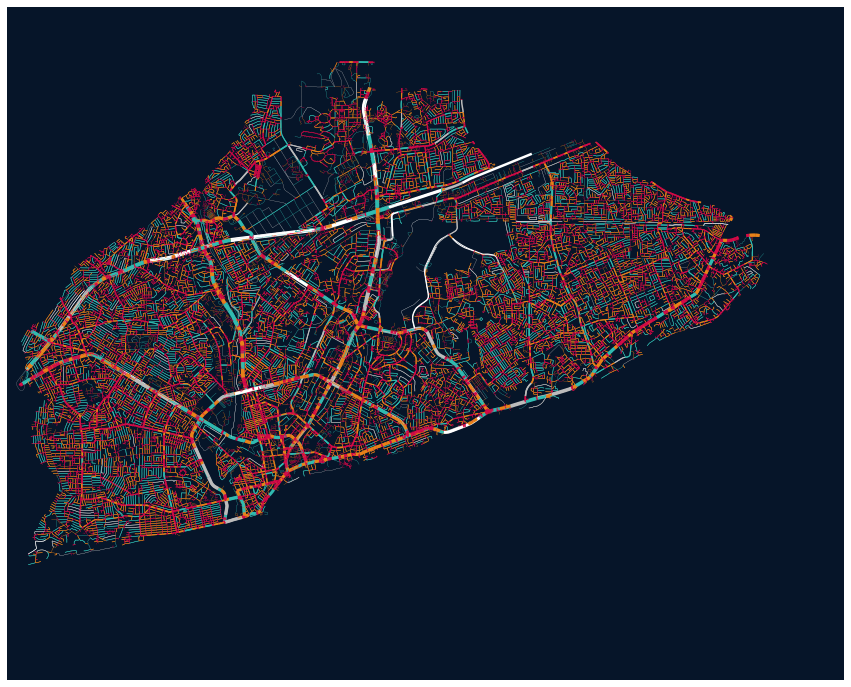

time: 11.7 s (started: 2023-01-16 04:19:53 +00:00)


In [ ]:
# Set the center of the map
lat = 5.6037
lon = -0.1870

# Define the bounding box sides
north = lat + 0.08
south = lat - 0.12
west = lon + 0.15
east = lon - 0.12

# Create the map
fig, ax = ox.plot_graph(G, 
                        node_size = 0, 
                        bbox = (north, south, west, east), 
                        dpi = 300,
                        bgcolor = '#061529', 
                        save = False, 
                        edge_color = road_colours,
                        edge_linewidth = road_widths, 
                        edge_alpha = 1, 
                        figsize = (15, 15))

# Set text properties
markersize = 15

# Define legend elements
# Define the legend elements for the graph, specifying the marker shape, color, label, and fill color for each 
# road length category.
legend_elements = [Line2D([0], [0], marker = 's', color = "#061529", label = "< 100", markerfacecolor = "#d40a47", markersize = markersize),
                   Line2D([0], [0], marker = 's', color = "#061529", label = "100 - 200", markerfacecolor = "#e78119", markersize = markersize),
                   Line2D([0], [0], marker = 's', color = "#061529", label = "201 - 400", markerfacecolor = "#30bab0", markersize = markersize),
                   Line2D([0], [0], marker = 's', color = "#061529", label = "401 - 800", markerfacecolor = "#bbbbbb", markersize = markersize),
                   Line2D([0], [0], marker = 's', color = "#061529", label = "> 800", markerfacecolor = "w", markersize = markersize)
                   ]

# Create the legend for the graph and set its properties such as position, background color, font properties, etc.
leg = ax.legend(handles = legend_elements, bbox_to_anchor = (1.0, 0.0), frameon = True, ncol = 1, 
                facecolor = "#061529", framealpha = 0.9, loc = 'lower right', prop = metrofontprop_i)

# Add legend title
leg.set_title("Road Length (m)", prop = {"size": 20})
# Set color of legend title
leg.get_title().set_color("white")
# Set color for legend elements
for text in leg.get_texts():
  text.set_color("w")

# save figure
output = "/content/drive/MyDrive/Accra/Accra_Roads_osm.jpg"
fig.savefig(output,
            dpi = 300, bbox_inches = 'tight',
            facecolor = "#061529")
plt.show()

Add Frame To Image

In [ ]:

# Get color
def _color(color, mode):
    color = ImageColor.getcolor(color, mode)
    return color

# Expand image
def expand(image, fill = '#e0474c', bottom = 50, left = None, right = None, top = None):
  if left == None:
      left = 0
  if right == None:
      right = 0
  if top == None:
      top = 0
      
  width = left + image.size[0] + right
  height = top + image.size[1] + bottom
  out = Image.new(image.mode, (width, height), _color(fill, image.mode))
  out.paste(image, (left, top))
  return out

# Add border
def add_border(input_image, output_image, fill = '#e0474c', bottom = 50, left = None, right = None, top = None):
  if left == None:
      left = 4
  if right == None:
      right = 4
  if top == None:
      top = 4
      
  img = Image.open(input_image)
  bimg = expand(img, bottom = bottom, left = left, right = right, top = top, fill= fill)
  bimg.save(output)

time: 2.87 ms (started: 2023-01-16 04:20:20 +00:00)


In [ ]:
# Input image 
in_img = output
out_img = output

# Output Image
add_border(in_img, output_image = out_img, fill = '#061529', bottom = 260)

time: 370 ms (started: 2023-01-16 04:20:42 +00:00)


## Add Text to Image Border

In [ ]:
# Open Image
img = Image.open(out_img)
draw = ImageDraw.Draw(img)

font = ImageFont.truetype(candara, 180)
margin = 20

text = "Road Network, Accra" 
text_width, text_height = font.getsize(text)
x = (3553 - text_width) / 2
y = 3126 - text_height - margin
draw.text((x, y), text, (255, 255, 255), font = font, prop = {'weight':'bold'})

# Save image
img.save('/content/drive/MyDrive/Accra/accra_road_network_osm.jpg')
# plt.imshow(img)

# plt.show()

# img.size

time: 366 ms (started: 2023-01-16 04:20:56 +00:00)
